# 정적 시각화 실습 - seaborn 활용

In [18]:
# 필요 라이브러리 로딩
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# iris 데이터세트 로딩
df = sns.load_dataset('iris') # iris 붓꽃 데이터 로딩
display(df.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

변수 설명 :
   - sepal_length : 꽃받침 길이
   - sepal_width : 꽃받침 너비
   - petal_length : 꽃잎 길이
   - petal_width : 꽃잎 너비

### 산점도 : scatterplot

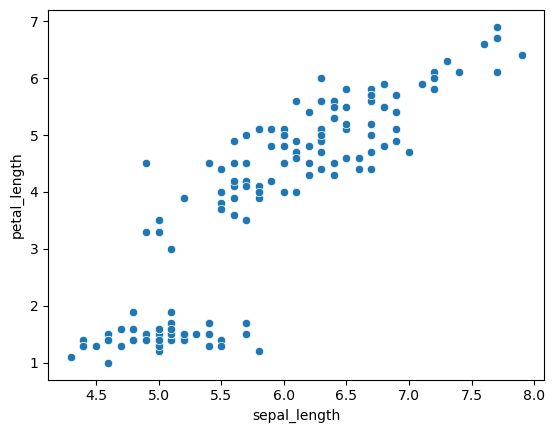

In [19]:
# 스카터 플롯은 총 2개의 수치형 변수 x와 y가 필요함

sns.scatterplot(x='sepal_length', y='petal_length', data=df)
#plt.savefig('iris_scatter_seaborn.png')
plt.show()

**scatterplot**의 **hue** 옵션

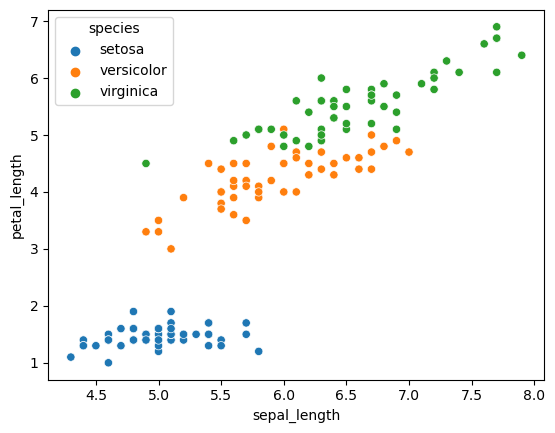

In [22]:
# hue 인수의 값을 설정해 준다면, 종류를 색상으로 나타낼 수 있음
# 붓꽃 종류별로 다른 색상의 점을 나타내고 싶다면, hue의 인수값으로 'speices'로 설정하면 됨

sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=df)
plt.show()

**scatterplot**의  **marker**&**aplpha** 옵션

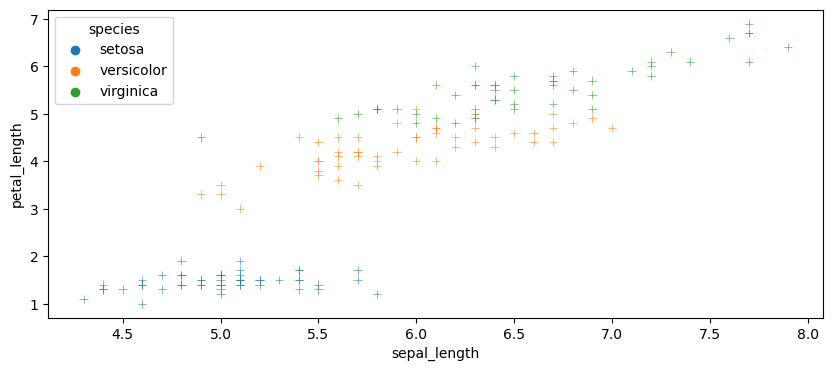

In [23]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='sepal_length',
               y='petal_length',
               hue='species',
               marker='+', #점의 모양
               alpha=0.8, # 투명도 설정 0~1
               data=df
               )
plt.show()

### 산점도 + 추세선 : regplot

**regplot**도 산점도에 기반합니다
**scatterplot**과 다른점이 있다면, **regplot**을 이용하면 추세선의 신뢰구간(confidence interval)을 넣을 수 있습니다.

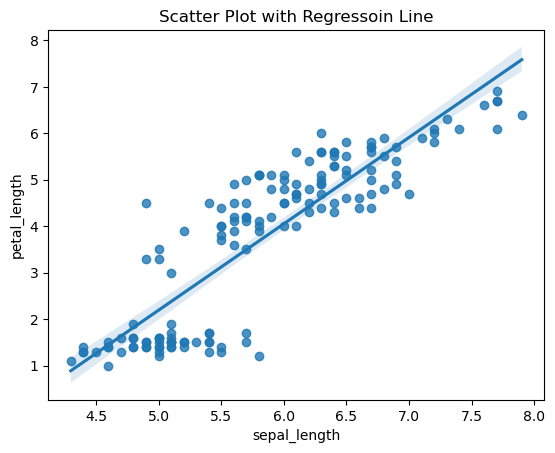

In [24]:
# regplot 호출
sns.regplot(x='sepal_length', y='petal_length', data=df)
plt.title('Scatter Plot with Regressoin Line')
plt.show()

#### 신뢰구간 제거 : ci 인수

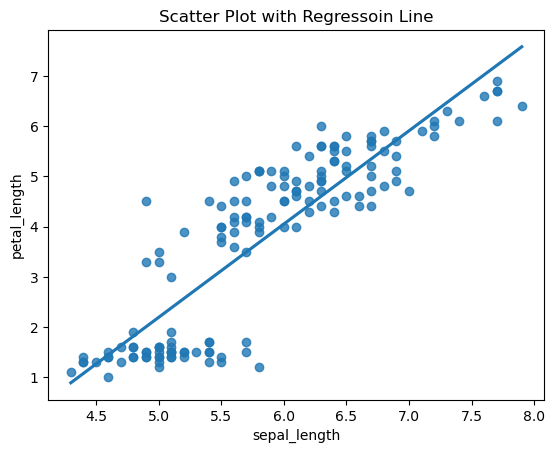

In [25]:
sns.regplot(x='sepal_length', y='petal_length',ci=None, data=df)
plt.title('Scatter Plot with Regressoin Line')
plt.show()

### 범주별 산점도 + 추세선 : lmplot 

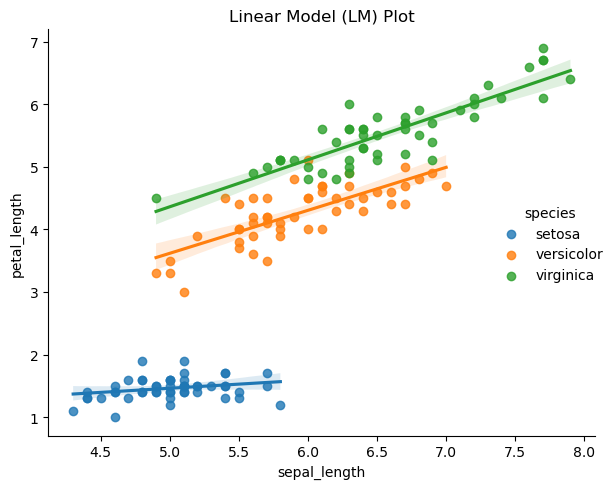

In [26]:
sns.lmplot(x='sepal_length', y='petal_length', hue='species',data=df) # hue 인수 추가 가능 # ci 인수 가능
plt.title('Linear Model (LM) Plot')
plt.tight_layout()
plt.show()

### 점도표 : rugplot

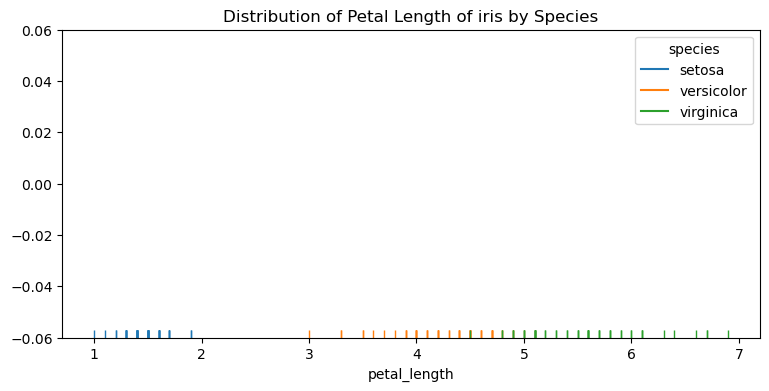

In [30]:
# 점도표
plt.figure(figsize=(9,4))
sns.rugplot(data=df, x='petal_length', hue='species')
plt.title('Distribution of Petal Length of iris by Species')
plt.show()

### 단변량 & 다변량 시각화 : pairplot

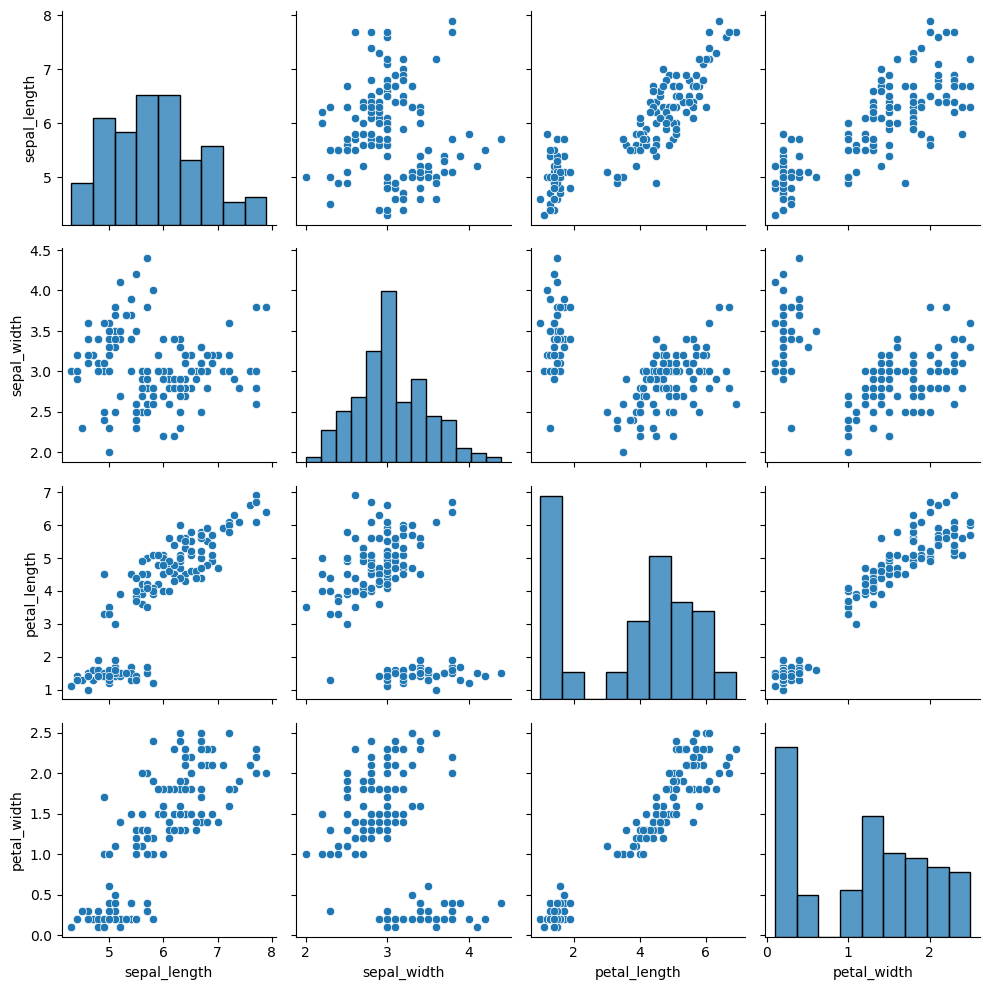

In [33]:
# seaborn의 pairplot
sns.pairplot(df)
plt.tight_layout()
plt.show()

#### 범주별 pairplot : hue 옵션

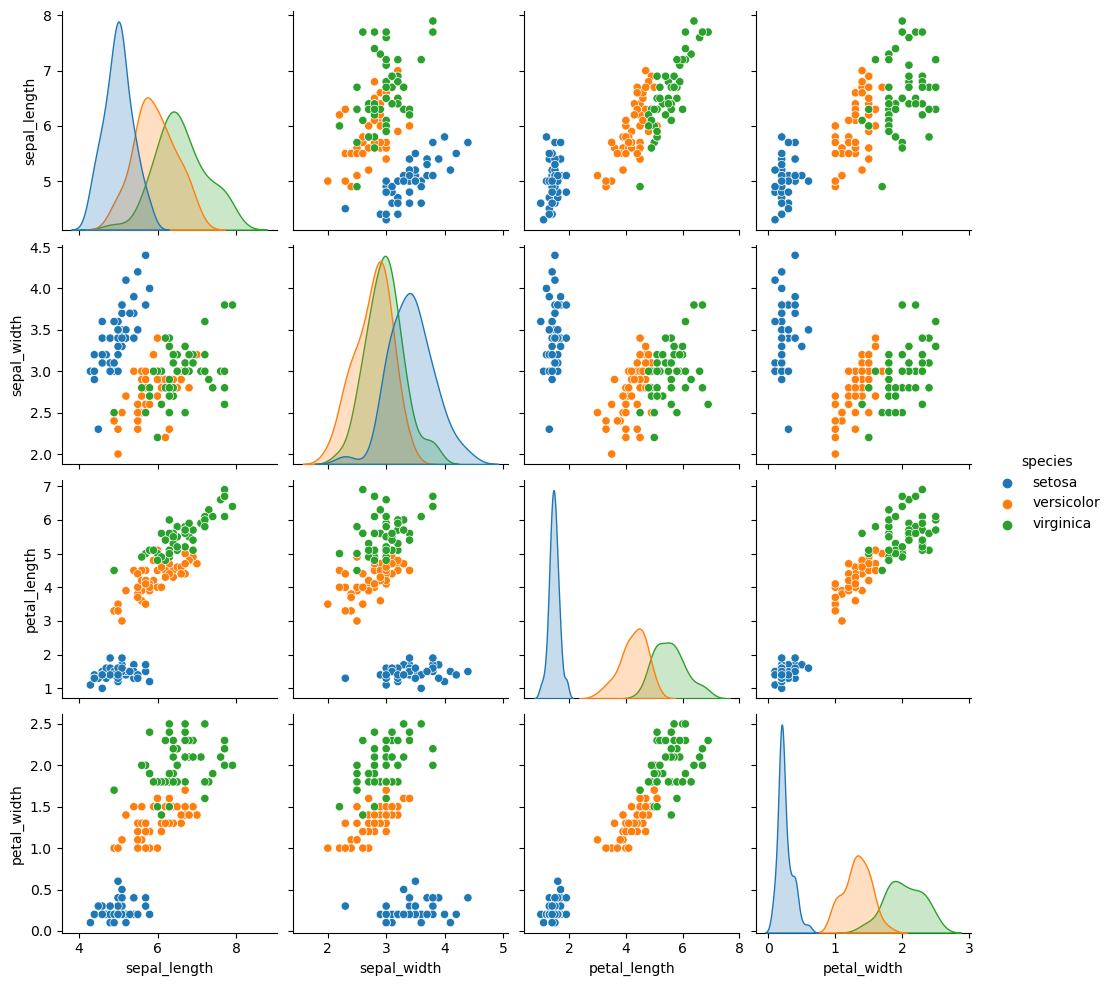

In [34]:
# pairplot by species

sns.pairplot(df, hue='species')
plt.show()

#### pairplot 타이틀 설정 예제

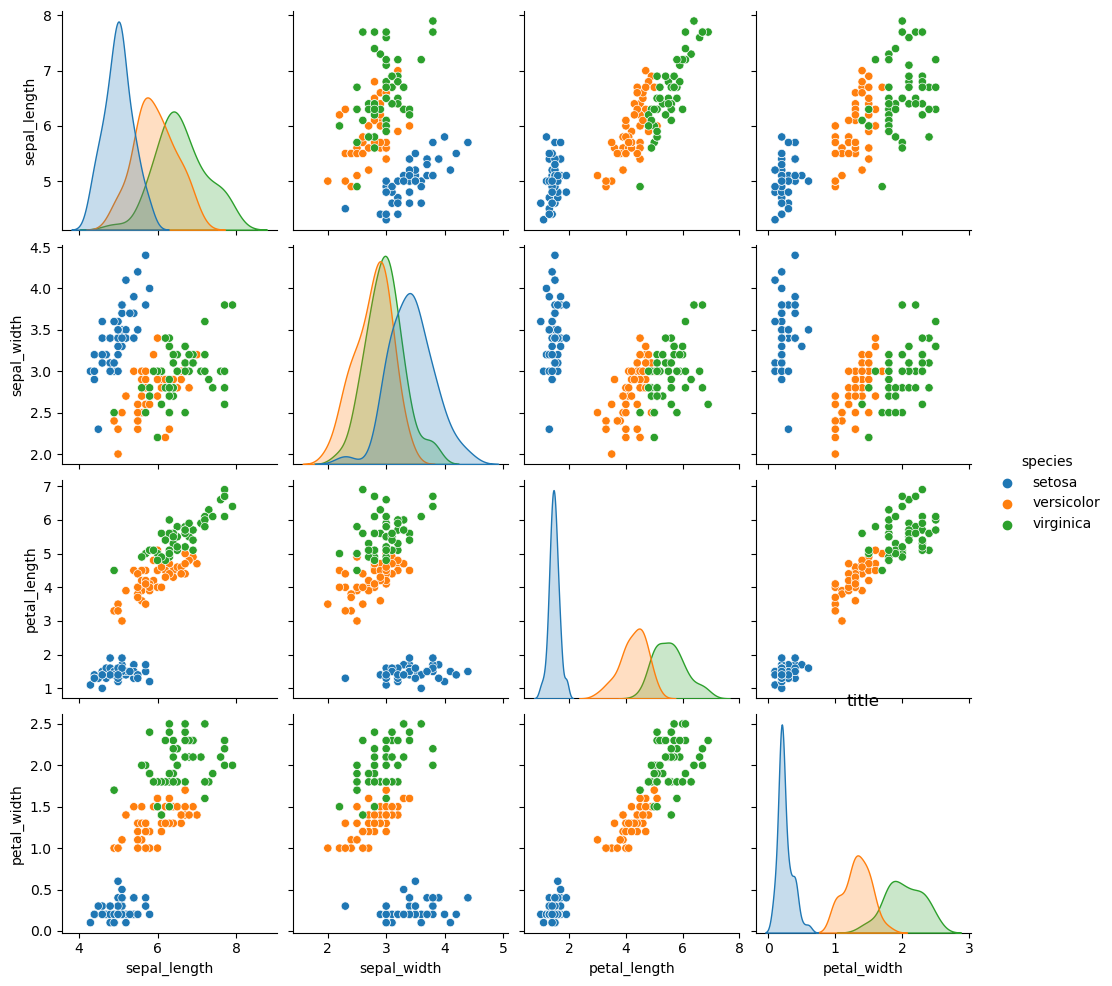

In [36]:
# plt.title을 사용하면 마지막 그래프의 title이됨
sns.pairplot(df, hue='species')
plt.title('title')
plt.show()

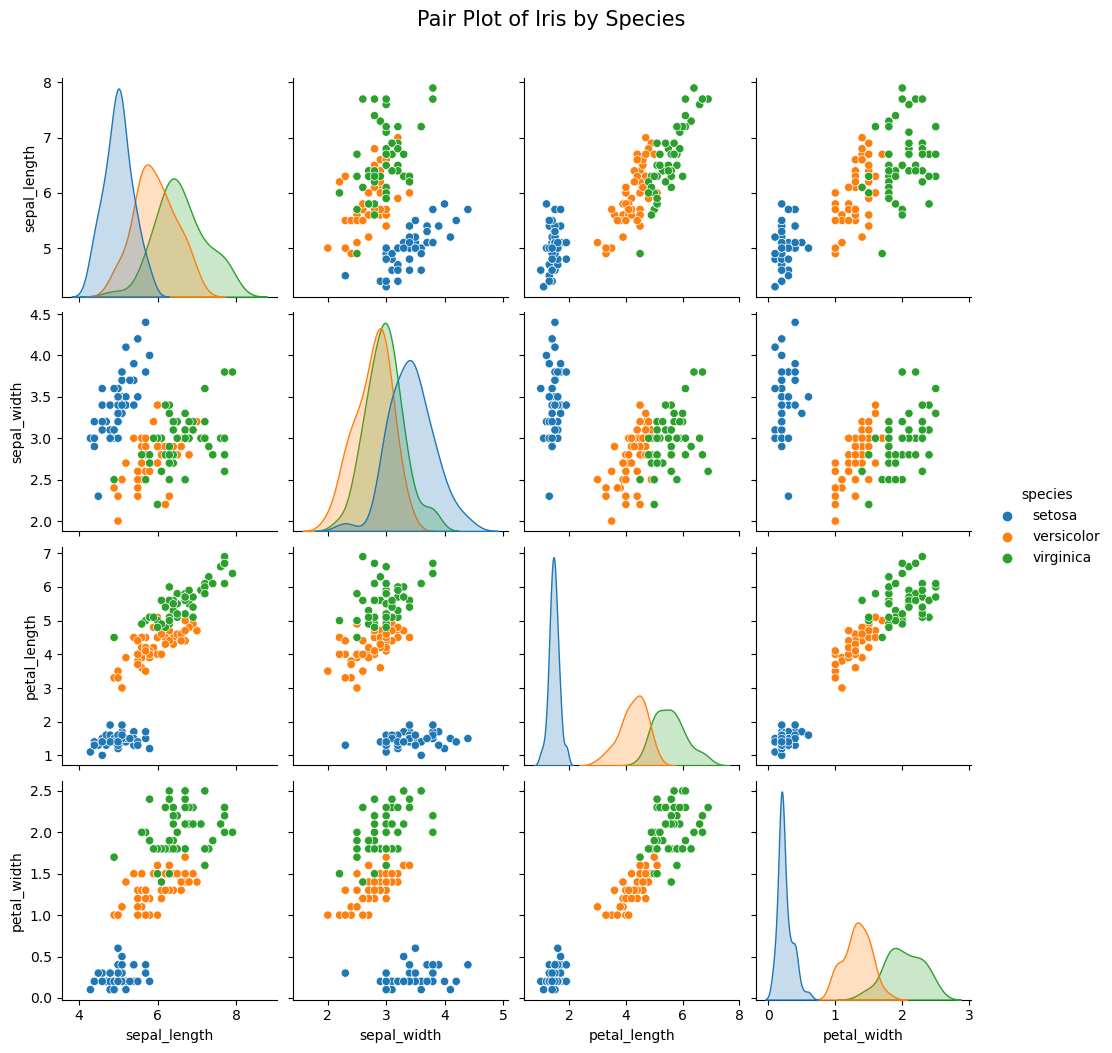

In [39]:
# 1. pairplot을 plot이란 변수에 할당
plot = sns.pairplot(df, hue='species')

# 2. fig.suptitle 기능활용
plot.fig.suptitle('Pair Plot of Iris by Species', y=1.05, fontsize=15)
plt.show()



**pairplot**은 강력한 기능이지만 모든 상황에서 사용할 수 있는것은 아닙니다.
실수형 변수가 더 많은 경우라면(e.g. 10개 20개 ...), **figure**에 모든 정보를 담기 힘들며, 연산시간이 오래걸릴 것입니다.
결국 가독성이 떨어지는 그래프가 나오거나 알아보기 불가능한 그래프, 또는 메모리 부족과 같은 문제가 생기게 됩니다.

### seaborn의 heatmap

히트맵은 말그대로 heat*map으로 빈도에 따라 뜨거움의 정도를 맵에 표현하는 기능
여러 방면에서 활용도가 높으며 2차원 데이터를 다룰대 매우 유용합니다.
   - 참고 : **heatmap**은 한번에 많은 수치형 변수들의 상관관계를 시각화할 때도 유용합니다. 

In [57]:
## 데이터 로딩
## 없으니 만듬
import numpy as np
rate = [[5824,5980,5655,8892,5096,5304,12584,14768,12285,17680,18720],
        [6136,6552,7800,7020,5096,4888,12116,14404,11739,12402,8892],
        [6864,3666,9256,7527,9204,12220,10413,8242,13884,18824,10556],
        [5031,5265,4238,7059,6110,8853,10491,8138,13572,13572,20592],
        [6292,3250,6708,4758,8931,9126,14040,16536,18460,9438,10920],
        [10530,9685,13884,17004,15795,20592,24570,24310,32916,33930,36816],
        [11544,13260,15522,20930,24024,23556,28392,32214,36270,38298,42774],
        [11544,13260,12935,15730,17680,19045,22555,31590,36426,32825,43602],
        [7072,8216,9568,5434,6162,10101,8112,13845,15756,21008,24076],
        [6188,5187,4212,4966,5486,5954,10686,15912,13533,14001,21164],
        [2704,4446,3796,8944,4680,7917,12324,7046,15860,16120,18824],
        [4602,7280,6474,None,8420.5,11908,14456,15912,17472,17524,21060]]


data = {'year' : [],
        'month' : [],
        'rentals' : []}

for m in range(12):
    for i in range(11):
        data['year'].append(2010+i)
        data['month'].append(m+1)
        data['rentals'].append(rate[m][i])


car_rentals = pd.DataFrame(data)
car_rentals     

,year,month,rentals
0,2010,1,5824.0
1,2011,1,5980.0
2,2012,1,5655.0
3,2013,1,8892.0
4,2014,1,5096.0
...,...,...,...
127,2016,12,14456.0
128,2017,12,15912.0
129,2018,12,17472.0
130,2019,12,17524.0


### 피벗테이블 생성 : povot_table

In [59]:
# povot 테이블 생성
rental_pivot = pd.pivot_table(car_rentals, index='month', columns='year', values='rentals')
display(rental_pivot)

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
month,,,,,,,,,,,
1,5824.0,5980.0,5655.0,8892.0,5096.0,5304.0,12584.0,14768.0,12285.0,17680.0,18720.0
2,6136.0,6552.0,7800.0,7020.0,5096.0,4888.0,12116.0,14404.0,11739.0,12402.0,8892.0
3,6864.0,3666.0,9256.0,7527.0,9204.0,12220.0,10413.0,8242.0,13884.0,18824.0,10556.0
4,5031.0,5265.0,4238.0,7059.0,6110.0,8853.0,10491.0,8138.0,13572.0,13572.0,20592.0
5,6292.0,3250.0,6708.0,4758.0,8931.0,9126.0,14040.0,16536.0,18460.0,9438.0,10920.0
6,10530.0,9685.0,13884.0,17004.0,15795.0,20592.0,24570.0,24310.0,32916.0,33930.0,36816.0
7,11544.0,13260.0,15522.0,20930.0,24024.0,23556.0,28392.0,32214.0,36270.0,38298.0,42774.0
8,11544.0,13260.0,12935.0,15730.0,17680.0,19045.0,22555.0,31590.0,36426.0,32825.0,43602.0
9,7072.0,8216.0,9568.0,5434.0,6162.0,10101.0,8112.0,13845.0,15756.0,21008.0,24076.0


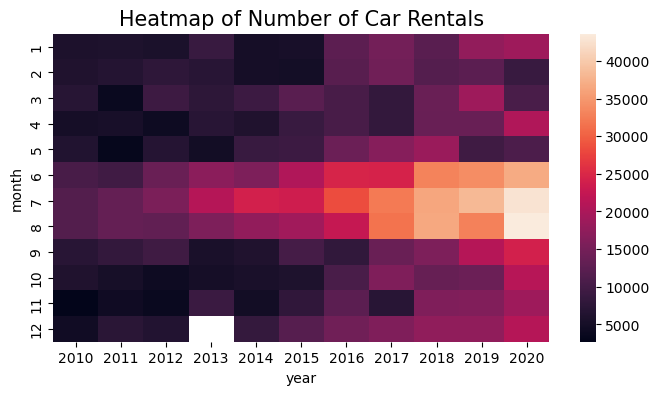

In [60]:
#피트맵 생성
plt.figure(figsize=(8,4))
sns.heatmap(rental_pivot)
plt.title('Heatmap of Number of Car Rentals', fontsize=15)
plt.show()

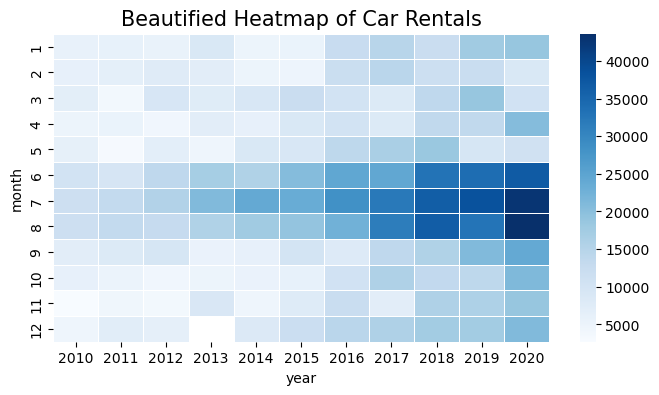

In [63]:
# g히트맵 옵션 부여

plt.figure(figsize=(8,4))
sns.heatmap(rental_pivot,
           cbar=True, # 그래프 우측 컬러바 표기 여부
           linewidths=0.5, # cell 사이의 간격 설정
           annot=False, # 히트맵 빈도수 표기
           cmap='Blues' # 히트맵 색상 설정
           )
plt.title('Beautified Heatmap of Car Rentals', fontsize=15)
plt.show()